![](../docs/banner.png)

# Chapter 9: Advanced Data Wrangling With Pandas

<h2>Chapter Outline<span class="tocSkip"></span></h2>
<hr>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-Working-With-Strings" data-toc-modified-id="1.-Working-With-Strings-2">1. Working With Strings</a></span></li><li><span><a href="#2.-Working-With-Datetimes" data-toc-modified-id="2.-Working-With-Datetimes-3">2. Working With Datetimes</a></span></li><li><span><a href="#3.-Hierachical-Indexing" data-toc-modified-id="3.-Hierachical-Indexing-4">3. Hierachical Indexing</a></span></li><li><span><a href="#4.-Visualizing-DataFrames" data-toc-modified-id="4.-Visualizing-DataFrames-5">4. Visualizing DataFrames</a></span></li><li><span><a href="#5.-Pandas-Profiling" data-toc-modified-id="5.-Pandas-Profiling-6">5. Pandas Profiling</a></span></li></ul></div>

## Chapter Learning Objectives
<hr>

- Manipulate strings in Pandas by accessing methods from the `Series.str` attribute.
- Understand how to use regular expressions in Pandas for wrangling strings.
- Differentiate between datetime object in Pandas such as `Timestamp`, `Timedelta`, `Period`, `DateOffset`.
- Create these datetime objects with functions like `pd.Timestamp()`, `pd.Period()`, `pd.date_range()`, `pd.period_range()`.
- Index a datetime index with partial string indexing.
- Perform basic datetime operations like splitting a datetime into constituent parts (e.g., `year`, `weekday`, `second`, etc), apply offsets, change timezones, and resample with `.resample()`.
- Make basic plots in Pandas by accessing the `.plot` attribute or importing functions from `pandas.plotting`.

## 1. Working With Strings
<hr>

In [1]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows", 20)

Working with text data is common in data science. Luckily, Pandas Series and Index objects are equipped with a set of string processing methods which we'll explore here.

### String dtype

String data is represented in pandas using the `object` dtype, which is a generic dtype for representing mixed data or data of unknown size. It would be better to have a dedicated dtype and Pandas has just introduced this: the `StringDtype`. `object` remains the default dtype for strings however, as Pandas looks to continue testing and improving the `string` dtype. You can read more about the `StringDtype` in the [Pandas documentation here](https://pandas.pydata.org/pandas-docs/stable/user_guide/text.html#text-data-types).

### String Methods

We've seen how libraries like NumPy and Pandas can vectorise operations for increased speed and useability:

In [2]:
x = np.array([1, 2, 3, 4, 5])
x * 2

array([ 2,  4,  6,  8, 10])

This is not the case for arrays of strings however:

In [3]:
x = np.array(['Tom', 'Mike', 'Tiffany', 'Joel', 'Varada'])
x.upper()

AttributeError: 'numpy.ndarray' object has no attribute 'upper'

Instead, you would have to operate on each string object one at a time, using a loop for example:

In [4]:
[name.upper() for name in x]

['TOM', 'MIKE', 'TIFFANY', 'JOEL', 'VARADA']

But even this will fail if your array contains a missing value:

In [5]:
x = np.array(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
[name.upper() for name in x]

AttributeError: 'NoneType' object has no attribute 'upper'

Pandas addresses both of these issues (vectorization and missing values) with its string methods. String methods can be accessed by the `.str` attribute of Pandas Series and Index objects. Pretty much all built-in string operations (`.upper()`, `.lower()`, `.split()`, etc) and more are available.

In [6]:
s = pd.Series(x)
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [7]:
s.str.upper()

0        TOM
1       MIKE
2       None
3    TIFFANY
4       JOEL
5     VARADA
dtype: object

In [8]:
s.str.split("ff", expand=True)

,0,1
0,Tom,None
1,Mike,None
2,None,None
3,Ti,any
4,Joel,None
5,Varada,None


In [9]:
s.str.len()

0    3.0
1    4.0
2    NaN
3    7.0
4    4.0
5    6.0
dtype: float64

We can also operate on Index objects (i.e., index or column labels):

In [10]:
df = pd.DataFrame(np.random.rand(5, 3),
                  columns = ['Measured Feature', 'recorded feature', 'PredictedFeature'],
                  index = [f"ROW{_}" for _ in range(5)])
df

,Measured Feature,recorded feature,PredictedFeature
ROW0,0.200112,0.790722,0.655438
ROW1,0.866312,0.941067,0.179676
ROW2,0.478350,0.844712,0.983463
ROW3,0.028143,0.120413,0.396831
ROW4,0.941455,0.526084,0.731475


In [11]:
type(df.columns)

pandas.core.indexes.base.Index

Let's clean up those labels by:
1. Removing the word "feature" and "Feature"
2. Lowercase the "ROW" and add an underscore between the digit and letters

In [12]:
df.columns = df.columns.str.capitalize().str.replace("feature", "").str.strip()

In [13]:
df.index = df.index.str.lower().str.replace("w", "w_")

In [14]:
df

,Measured,Recorded,Predicted
row_0,0.200112,0.790722,0.655438
row_1,0.866312,0.941067,0.179676
row_2,0.478350,0.844712,0.983463
row_3,0.028143,0.120413,0.396831
row_4,0.941455,0.526084,0.731475


Great that worked! There are so many string operations you can use in Pandas. Here's a full list of all the string methods available in Pandas that I pulled from the documentation:

| Method                     | Description                                                                                                                       |
| -------------------------- | --------------------------------------------------------------------------------------------------------------------------------- |
| `Series.str.cat`           | Concatenate strings                                                                                                               |
| `Series.str.split`         | Split strings on delimiter                                                                                                        |
| `Series.str.rsplit`        | Split strings on delimiter working from the end of the string                                                                     |
| `Series.str.get`           | Index into each element (retrieve i-th element)                                                                                   |
| `Series.str.join`          | Join strings in each element of the Series with passed separator                                                                  |
| `Series.str.get_dummies`   | Split strings on the delimiter returning DataFrame of dummy variables                                                             |
| `Series.str.contains`      | Return boolean array if each string contains pattern/regex                                                                        |
| `Series.str.replace`       | Replace occurrences of pattern/regex/string with some other string or the return value of a callable given the occurrence         |
| `Series.str.repeat`        | Duplicate values (`s.str.repeat(3)` equivalent to `x * 3`)                                                                        |
| `Series.str.pad`           | "Add whitespace to left, right, or both sides of strings"                                                                         |
| `Series.str.center`        | Equivalent to `str.center`                                                                                                        |
| `Series.str.ljust`         | Equivalent to `str.ljust`                                                                                                         |
| `Series.str.rjust`         | Equivalent to `str.rjust`                                                                                                         |
| `Series.str.zfill`         | Equivalent to `str.zfill`                                                                                                         |
| `Series.str.wrap`          | Split long strings into lines with length less than a given width                                                                 |
| `Series.str.slice`         | Slice each string in the Series                                                                                                   |
| `Series.str.slice_replace` | Replace slice in each string with passed value                                                                                    |
| `Series.str.count`         | Count occurrences of pattern                                                                                                      |
| `Series.str.startswith`    | Equivalent to `str.startswith(pat)` for each element                                                                              |
| `Series.str.endswith`      | Equivalent to `str.endswith(pat)` for each element                                                                                |
| `Series.str.findall`       | Compute list of all occurrences of pattern/regex for each string                                                                  |
| `Series.str.match`         | "Call `re.match` on each element, returning matched groups as list"                                                               |
| `Series.str.extract`       | "Call `re.search` on each element, returning DataFrame with one row for each element and one column for each regex capture group" |
| `Series.str.extractall`    | "Call `re.findall` on each element, returning DataFrame with one row for each match and one column for each regex capture group"  |
| `Series.str.len`           | Compute string lengths                                                                                                            |
| `Series.str.strip`         | Equivalent to `str.strip`                                                                                                         |
| `Series.str.rstrip`        | Equivalent to `str.rstrip`                                                                                                        |
| `Series.str.lstrip`        | Equivalent to `str.lstrip`                                                                                                        |
| `Series.str.partition`     | Equivalent to `str.partition`                                                                                                     |
| `Series.str.rpartition`    | Equivalent to `str.rpartition`                                                                                                    |
| `Series.str.lower`         | Equivalent to `str.lower`                                                                                                         |
| `Series.str.casefold`      | Equivalent to `str.casefold`                                                                                                      |
| `Series.str.upper`         | Equivalent to `str.upper`                                                                                                         |
| `Series.str.find`          | Equivalent to `str.find`                                                                                                          |
| `Series.str.rfind`         | Equivalent to `str.rfind`                                                                                                         |
| `Series.str.index`         | Equivalent to `str.index`                                                                                                         |
| `Series.str.rindex`        | Equivalent to `str.rindex`                                                                                                        |
| `Series.str.capitalize`    | Equivalent to `str.capitalize`                                                                                                    |
| `Series.str.swapcase`      | Equivalent to `str.swapcase`                                                                                                      |
| `Series.str.normalize`     | Return Unicode normal form. Equivalent to `unicodedata.normalize`                                                                 |
| `Series.str.translate`     | Equivalent to `str.translate`                                                                                                     |
| `Series.str.isalnum`       | Equivalent to `str.isalnum`                                                                                                       |
| `Series.str.isalpha`       | Equivalent to `str.isalpha`                                                                                                       |
| `Series.str.isdigit`       | Equivalent to `str.isdigit`                                                                                                       |
| `Series.str.isspace`       | Equivalent to `str.isspace`                                                                                                       |
| `Series.str.islower`       | Equivalent to `str.islower`                                                                                                       |
| `Series.str.isupper`       | Equivalent to `str.isupper`                                                                                                       |
| `Series.str.istitle`       | Equivalent to `str.istitle`                                                                                                       |
| `Series.str.isnumeric`     | Equivalent to `str.isnumeric`                                                                                                     |
| `Series.str.isdecimal`     | Equivalent to `str.isdecimal`                                                                                                     |

I will also mention that I often use the dataframe method `df.replace()` to do string replacements:

In [15]:
df = pd.DataFrame({'col1': ['replace me', 'b', 'c'],
                   'col2': [1, 99999, 3]})
df

,col1,col2
0,replace me,1
1,b,99999
2,c,3


In [16]:
df.replace({'replace me': 'a',
            99999: 2})

,col1,col2
0,a,1
1,b,2
2,c,3


### Regular Expressions

A regular expression (regex) is a sequence of characters that defines a search pattern. For more complex string operations, you'll definitely want to use regex. [Here's a great cheatsheet](https://www.rexegg.com/regex-quickstart.html) of regular expression syntax. I am self-admittedly not a regex expert, I usually jump over to [RegExr.com](https://regexr.com/) and play around until I find the expression I want. Many Pandas string functions accept regular expressions as input, these are the ones I use most often:

|Method|Description|
|---|---|
|`match()`|Call re.match() on each element, returning a boolean.
|`extract()`|Call re.match() on each element, returning matched groups as strings.
|`findall()`|Call re.findall() on each element
|`replace()`|Replace occurrences of pattern with some other string
|`contains()`|Call re.search() on each element, returning a boolean
|`count()`|Count occurrences of pattern
|`split()`|Equivalent to str.split(), but accepts regexps
|`rsplit()`|Equivalent to str.rsplit(), but accepts regexps

For example, we can easily find all names in our Series that start and end with a consonant:

In [17]:
s = pd.Series(['Tom', 'Mike', None, 'Tiffany', 'Joel', 'Varada'])
s

0        Tom
1       Mike
2       None
3    Tiffany
4       Joel
5     Varada
dtype: object

In [18]:
s.str.findall(r'^[^AEIOU].*[^aeiou]$')

0        [Tom]
1           []
2         None
3    [Tiffany]
4       [Joel]
5           []
dtype: object

Let's break down that regex:

|Part|Description|
|---|---|
|`^`|Specifies the start of a string|
|`[^AEIOU]`|Square brackets match a single character. When `^` is used inside square brackets it means "not", so we are are saying, "the first character of the string should not be A, E, I, O, or U (i.e., a vowel)"|
|`.*`|`.` matches any character and `*` means "0 or more time", this is basically saying that we can have any number of characters in the middle of our string|
|`[^aeiou]$`| `$` matches the end of the string, so we are saying, we don't want the last character to be a lowercase vowel|

Regex can do some truly magical things so keep it in mind when you're doing complicated text wrangling. Let's see one more example on the cycling dataset:

In [19]:
df = pd.read_csv('data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


We could find all the comments that contains the string "Rain" or "rain":

In [20]:
df.loc[df['Comments'].str.contains(r"[Rr]ain")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"17 Sep 2019, 13:43:34",Morning Ride,Ride,2285,12.60,Raining
"18 Sep 2019, 13:49:53",Morning Ride,Ride,2903,14.57,Raining today
"26 Sep 2019, 00:13:33",Afternoon Ride,Ride,1860,12.52,raining


If we didn't want to include "Raining" or "raining", we could do:

In [21]:
df.loc[df['Comments'].str.contains(r"^[Rr]ain$")]

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain


We can even split strings and separate them into new columns, for example, based on punctuation:

In [22]:
df['Comments'].str.split(r"[.,!]", expand=True)

,0,1
Date,,
"10 Sep 2019, 00:13:04",Rain,None
"10 Sep 2019, 13:52:18",rain,None
"11 Sep 2019, 00:23:50",Wet road but nice weather,None
"11 Sep 2019, 14:06:19",Stopped for photo of sunrise,None
"12 Sep 2019, 00:28:05",Tired by the end of the week,None
...,...,...
"4 Oct 2019, 01:08:08",Very tired,riding into the wind
"9 Oct 2019, 13:55:40",Really cold,But feeling good
"10 Oct 2019, 00:10:31",Feeling good after a holiday break,


My point being here that you can pretty much do anything your heart desires!

## 2. Working With Datetimes
<hr>

Just like with strings, Pandas has extensive functionality for working with time series data.

### Datetime dtype and Motivation for Using Pandas

Python has built-in support for datetime format, that is, an object that contains time and date information, in the `datetime` module.

In [23]:
from datetime import datetime, timedelta

In [24]:
date = datetime(year=2005, month=7, day=9, hour=13, minute=54)
date

datetime.datetime(2005, 7, 9, 13, 54)

We can also parse directly from a string, see [format codes here](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes):

In [25]:
date = datetime.strptime("July 9 2005, 13:54", "%B %d %Y, %H:%M")
date

datetime.datetime(2005, 7, 9, 13, 54)

We can then extract specific information from our data:

In [26]:
print(f"Year: {date.strftime('%Y')}")
print(f"Month: {date.strftime('%B')}")
print(f"Day: {date.strftime('%d')}")
print(f"Day name: {date.strftime('%A')}")
print(f"Day of year: {date.strftime('%j')}")
print(f"Time of day: {date.strftime('%p')}")

Year: 2005
Month: July
Day: 09
Day name: Saturday
Day of year: 190
Time of day: PM


And perform basic operations, like adding a week:

In [27]:
date + timedelta(days=7)

datetime.datetime(2005, 7, 16, 13, 54)

But as with strings, working with arrays of datetimes in Python can be difficult and inefficient. NumPy, therefore included a new datetime object to work more effectively with dates:

In [28]:
dates = np.array(["2020-07-09", "2020-08-10"], dtype="datetime64")
dates

array(['2020-07-09', '2020-08-10'], dtype='datetime64[D]')

We can create arrays using other built-in functions like `np.arange()` too:

In [29]:
dates = np.arange("2020-07", "2020-12", dtype='datetime64[M]')
dates

array(['2020-07', '2020-08', '2020-09', '2020-10', '2020-11'],
      dtype='datetime64[M]')

Now we can easily do operations on arrays of time. You can check out all the datetime units and their format in the documentation [here](https://numpy.org/doc/stable/reference/arrays.datetime.html#datetime-units).

In [30]:
dates +  np.timedelta64(2, 'M')

array(['2020-09', '2020-10', '2020-11', '2020-12', '2021-01'],
      dtype='datetime64[M]')

But while numpy helps bring datetimes into the array world, it's missing a lot of functionality that we would commonly want/need for wrangling tasks. This is where Pandas comes in. Pandas consolidates and extends functionality from the `datetime` module, `numpy`, and other libraries like `scikits.timeseries` into a single place. Pandas provides 4 key datetime objects which we'll explore in the following sections:
1. Timestamp (like np.datetime64)
2. Timedelta (like np.timedelta64)
3. Period (custom object for regular ranges of datetimes)
4. DateOffset (custom object like timedelta but factoring in calendar rules)

### Creating Datetimes

#### From scratch

Most commonly you'll want to:
1. Create a single point in time with `pd.Timestamp()`, e.g., `2005-07-09 00:00:00`
2. Create a span of time with `pd.Period()`, e.g., `2020 Jan`
3. Create an array of datetimes with `pd.date_range()` or `pd.period_range()`

In [31]:
print(pd.Timestamp('2005-07-09'))  # parsed from string
print(pd.Timestamp(year=2005, month=7, day=9))  # pass data directly
print(pd.Timestamp(datetime(year=2005, month=7, day=9)))  # from datetime object

2005-07-09 00:00:00
2005-07-09 00:00:00
2005-07-09 00:00:00


The above is a specific point in time. Below, we can use `pd.Period()` to specify a span of time (like a day):

In [32]:
span = pd.Period('2005-07-09')
print(span)
print(span.start_time)
print(span.end_time)

2005-07-09
2005-07-09 00:00:00
2005-07-09 23:59:59.999999999


In [33]:
point = pd.Timestamp('2005-07-09 12:00')
span = pd.Period('2005-07-09')
print(f"Point: {point}")
print(f" Span: {span}")
print(f"Point in span? {span.start_time < point < span.end_time}")

Point: 2005-07-09 12:00:00
 Span: 2005-07-09
Point in span? True


Often, you'll want to create arrays of datetimes, not just single values. Arrays of datetimes are of the class `DatetimeIndex`/`PeriodIndex`/`TimedeltaIndex`:

In [34]:
pd.date_range('2020-09-01 12:00',
              '2020-09-11 12:00',
              freq='D')

DatetimeIndex(['2020-09-01 12:00:00', '2020-09-02 12:00:00',
               '2020-09-03 12:00:00', '2020-09-04 12:00:00',
               '2020-09-05 12:00:00', '2020-09-06 12:00:00',
               '2020-09-07 12:00:00', '2020-09-08 12:00:00',
               '2020-09-09 12:00:00', '2020-09-10 12:00:00',
               '2020-09-11 12:00:00'],
              dtype='datetime64[ns]', freq='D')

In [35]:
pd.period_range('2020-09-01',
                '2020-09-11',
                freq='D')

PeriodIndex(['2020-09-01', '2020-09-02', '2020-09-03', '2020-09-04',
             '2020-09-05', '2020-09-06', '2020-09-07', '2020-09-08',
             '2020-09-09', '2020-09-10', '2020-09-11'],
            dtype='period[D]', freq='D')

We can use `Timedelta` objects to perform temporal operations like adding or subtracting time:

In [36]:
pd.date_range('2020-09-01 12:00', '2020-09-11 12:00', freq='D') + pd.Timedelta('1.5 hour')

DatetimeIndex(['2020-09-01 13:30:00', '2020-09-02 13:30:00',
               '2020-09-03 13:30:00', '2020-09-04 13:30:00',
               '2020-09-05 13:30:00', '2020-09-06 13:30:00',
               '2020-09-07 13:30:00', '2020-09-08 13:30:00',
               '2020-09-09 13:30:00', '2020-09-10 13:30:00',
               '2020-09-11 13:30:00'],
              dtype='datetime64[ns]', freq='D')

Finally, Pandas represents missing datetimes with `NaT`, which is just like `np.nan`:

In [37]:
pd.Timestamp(pd.NaT)

NaT

#### By converting existing data

It's fairly common to have an array of dates as strings. We can use `pd.to_datetime()` to convert these to datetime:

In [38]:
string_dates = ['July 9, 2020', 'August 1, 2020', 'August 28, 2020']
string_dates

['July 9, 2020', 'August 1, 2020', 'August 28, 2020']

In [39]:
pd.to_datetime(string_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

For more complex datetime format, use the `format` argument (see [Python Format Codes](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes) for help):

In [40]:
string_dates = ['2020 9 July', '2020 1 August', '2020 28 August']
pd.to_datetime(string_dates, format="%Y %d %B")

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

Or use a dictionary:

In [41]:
dict_dates = pd.to_datetime({"year": [2020, 2020, 2020],
                             "month": [7, 8, 8],
                             "day": [9, 1, 28]})  # note this is a series, not an index!
dict_dates

0   2020-07-09
1   2020-08-01
2   2020-08-28
dtype: datetime64[ns]

In [42]:
pd.Index(dict_dates)

DatetimeIndex(['2020-07-09', '2020-08-01', '2020-08-28'], dtype='datetime64[ns]', freq=None)

#### By reading directly from an external source

Let's practice by reading in our favourite cycling dataset:

In [43]:
df = pd.read_csv('data/cycling_data.csv', index_col=0)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
"10 Sep 2019, 00:13:04",Afternoon Ride,Ride,2084,12.62,Rain
"10 Sep 2019, 13:52:18",Morning Ride,Ride,2531,13.03,rain
"11 Sep 2019, 00:23:50",Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
"11 Sep 2019, 14:06:19",Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
"12 Sep 2019, 00:28:05",Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
"4 Oct 2019, 01:08:08",Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
"9 Oct 2019, 13:55:40",Morning Ride,Ride,2149,12.70,Really cold! But feeling good
"10 Oct 2019, 00:10:31",Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


Our index is just a plain old index at the moment, with dtype `object`, full of `string` dates:

In [44]:
print(df.index.dtype)
type(df.index)

object


pandas.core.indexes.base.Index

We could manually convert our index to a datetime using `pd.to_datetime()`. But even better, `pd.read_csv()` has an argument `parse_dates` which can do this automatically when reading the file:

In [45]:
df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


In [46]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [47]:
print(df.index.dtype)
type(df.index)

datetime64[ns]


pandas.core.indexes.datetimes.DatetimeIndex

The `parse_dates` argument is very flexible and you can specify the datetime format for harder to read dates. There are other related arguments like `date_parser`, `dayfirst`, etc that are also helpful, check out the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) for more.

### Indexing Datetimes

Datetime index objects are just like regular Index objects and can be selected, sliced, filtered, etc.

In [48]:
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


We can do partial string indexing:

In [49]:
df.loc['2019-09']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-09-25 13:35:41,Morning Ride,Ride,2124,12.65,Stopped for photo of sunrise
2019-09-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining
2019-09-26 13:42:43,Morning Ride,Ride,2350,12.91,Detour around trucks at Jericho


Exact matching:

In [50]:
df.loc['2019-10-10']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


In [51]:
df.loc['2019-10-10 13:47:14']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


And slicing:

In [52]:
df.loc['2019-10-01':'2019-10-13']

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-01 00:15:07,Afternoon Ride,Ride,1732,NaN,Legs feeling strong!
2019-10-01 13:45:55,Morning Ride,Ride,2222,12.82,Beautiful morning! Feeling fit
2019-10-02 00:13:09,Afternoon Ride,Ride,1756,NaN,A little tired today but good weather
2019-10-02 13:46:06,Morning Ride,Ride,2134,13.06,Bit tired today but good weather
2019-10-03 00:45:22,Afternoon Ride,Ride,1724,12.52,Feeling good
2019-10-03 13:47:36,Morning Ride,Ride,2182,12.68,Wet road
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


`df.query()` will also work here:

In [53]:
df.query("'2019-10-10'")

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!
2019-10-10 13:47:14,Morning Ride,Ride,2463,12.79,Stopped for photo of sunrise


And for getting all results between two times of a day, use `df.between_time()`:

In [54]:
df.between_time('00:00', '01:00')

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
2019-09-17 00:15:47,Afternoon Ride,Ride,1973,12.45,Legs feeling strong!
2019-09-18 00:15:52,Afternoon Ride,Ride,2101,12.48,Pumped up tires
2019-09-19 00:30:01,Afternoon Ride,Ride,48062,12.48,Feeling good
2019-09-24 00:35:42,Afternoon Ride,Ride,2076,12.47,"Oiled chain, bike feels smooth"
2019-09-25 00:07:21,Afternoon Ride,Ride,1775,12.10,Feeling really tired
2019-09-26 00:13:33,Afternoon Ride,Ride,1860,12.52,raining


For more complicated filtering, we may have to decompose our timeseries, as we'll shown in the next section.

### Manipulating Datetimes

#### Decomposition

We can easily decompose our timeseries into its constituent components. There are [many attributes](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#time-date-components) that define these constituents.

In [55]:
df.index.year

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='Date')

In [56]:
df.index.second

Int64Index([ 4, 18, 50, 19,  5, 48, 47, 34, 53, 52,  1,  9,  5, 41, 42, 24, 21,
            41, 33, 43, 18, 52,  7, 55,  9,  6, 22, 36,  8, 40, 31, 14, 57],
           dtype='int64', name='Date')

In [57]:
df.index.weekday

Int64Index([1, 1, 2, 2, 3, 0, 1, 1, 2, 2, 3, 3, 4, 0, 1, 1, 2, 2, 3, 3, 4, 0,
            1, 1, 2, 2, 3, 3, 4, 2, 3, 3, 4],
           dtype='int64', name='Date')

As well as methods we can use:

In [58]:
df.index.day_name()

Index(['Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Monday',
       'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday', 'Thursday', 'Thursday',
       'Friday', 'Monday', 'Tuesday', 'Tuesday', 'Wednesday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday', 'Monday', 'Tuesday', 'Tuesday',
       'Wednesday', 'Wednesday', 'Thursday', 'Thursday', 'Friday', 'Wednesday',
       'Thursday', 'Thursday', 'Friday'],
      dtype='object', name='Date')

In [59]:
df.index.month_name()

Index(['September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'September', 'September', 'September',
       'September', 'September', 'October', 'October', 'October', 'October',
       'October', 'October', 'October', 'October', 'October', 'October',
       'October'],
      dtype='object', name='Date')

Note that if you're operating on a Series rather than a DatetimeIndex object, you can access this functionality through the `.dt` attribute:

In [60]:
s = pd.Series(pd.date_range('2011-12-29', '2011-12-31'))
s.year  # raises error

AttributeError: 'Series' object has no attribute 'year'

In [61]:
s.dt.year  # works

0    2011
1    2011
2    2011
dtype: int64

#### Offsets and Timezones

We saw before how we can use `Timedelta` to add/subtract time to our datetimes. `Timedelta` respects absolute time, which can be problematic in some cases, where time is not regular. For example, on March 8, Canada daylight savings started and clocks **moved forward 1 hour**. This extra "calendar hour" is not accounted for in absolute time:

In [62]:
t1 = pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific')
t2 = t1 + pd.Timedelta("1 day")
print(f"Original time: {t1}")
print(f" Plus one day: {t2}")  # note that time has moved from 12:00 -> 13:00

Original time: 2020-03-07 12:00:00-08:00
 Plus one day: 2020-03-08 13:00:00-07:00


Instead, we'd need to use a `Dateoffset`:

In [63]:
t3 = t1 + pd.DateOffset(days=1)
print(f"Original time: {t1}")
print(f" Plus one day: {t3}")  # note that time has stayed at 12:00

Original time: 2020-03-07 12:00:00-08:00
 Plus one day: 2020-03-08 12:00:00-07:00


You can see that we started including timezone information above. By default, datetime objects are "timezone unaware". To associate times with a timezone, we can use the `tz` argument in construction, or we can use the `tz_localize()` method:

In [64]:
print(f"        No timezone: {pd.Timestamp('2020-03-07 12:00:00').tz}")
print(f"             tz arg: {pd.Timestamp('2020-03-07 12:00:00', tz='Canada/Pacific').tz}")
print(f".tz_localize method: {pd.Timestamp('2020-03-07 12:00:00').tz_localize('Canada/Pacific').tz}")

        No timezone: None
             tz arg: Canada/Pacific
.tz_localize method: Canada/Pacific


You can convert between timezones using the `.tz_convert()` method. You might have noticed something funny about the times I've been riding to University:

In [65]:
df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 00:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 13:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-11 00:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 14:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 00:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 01:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 13:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 00:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


I know for a fact that I haven't been cycling around midnight... There's something wrong with the timezone in this dataset. I was using the `Strava` app to document my rides, it was recording in Canadian time but converting to Australia time. Let's go ahead and fix that up:

In [66]:
df.index = df.index.tz_localize("Canada/Pacific")  # first specify the current timezone
df.index = df.index.tz_convert("Australia/Sydney")  # then convert to the proper timezone
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-10 17:13:04+10:00,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-11 06:52:18+10:00,Morning Ride,Ride,2531,13.03,rain
2019-09-11 17:23:50+10:00,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-12 07:06:19+10:00,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-12 17:28:05+10:00,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-04 18:08:08+10:00,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-10 07:55:40+11:00,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-10 18:10:31+11:00,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


We could have also used a `DateOffset` if we knew the offset we wanted to apply, in this case, 7 hours:

In [67]:
df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True)
df.index = df.index + pd.DateOffset(hours=-7)
df

,Name,Type,Time,Distance,Comments
Date,,,,,
2019-09-09 17:13:04,Afternoon Ride,Ride,2084,12.62,Rain
2019-09-10 06:52:18,Morning Ride,Ride,2531,13.03,rain
2019-09-10 17:23:50,Afternoon Ride,Ride,1863,12.52,Wet road but nice weather
2019-09-11 07:06:19,Morning Ride,Ride,2192,12.84,Stopped for photo of sunrise
2019-09-11 17:28:05,Afternoon Ride,Ride,1891,12.48,Tired by the end of the week
...,...,...,...,...,...
2019-10-03 18:08:08,Afternoon Ride,Ride,1870,12.63,"Very tired, riding into the wind"
2019-10-09 06:55:40,Morning Ride,Ride,2149,12.70,Really cold! But feeling good
2019-10-09 17:10:31,Afternoon Ride,Ride,1841,12.59,Feeling good after a holiday break!


#### Resampling and Aggregating

One of the most common operations you will want do when working with time series is resampling the time series to a coarser/finer/regular resolution. For example, you may want to resample daily data to weekly data. We can do that with the `.resample()` method. For example, let's resample my irregular cycling timeseries to a regular 12-hourly series:

In [68]:
df.index

DatetimeIndex(['2019-09-09 17:13:04', '2019-09-10 06:52:18',
               '2019-09-10 17:23:50', '2019-09-11 07:06:19',
               '2019-09-11 17:28:05', '2019-09-16 06:57:48',
               '2019-09-16 17:15:47', '2019-09-17 06:43:34',
               '2019-09-18 06:49:53', '2019-09-17 17:15:52',
               '2019-09-18 17:30:01', '2019-09-19 06:52:09',
               '2019-09-19 18:02:05', '2019-09-23 06:50:41',
               '2019-09-23 17:35:42', '2019-09-24 06:41:24',
               '2019-09-24 17:07:21', '2019-09-25 06:35:41',
               '2019-09-25 17:13:33', '2019-09-26 06:42:43',
               '2019-09-26 18:00:18', '2019-09-30 06:53:52',
               '2019-09-30 17:15:07', '2019-10-01 06:45:55',
               '2019-10-01 17:13:09', '2019-10-02 06:46:06',
               '2019-10-02 17:45:22', '2019-10-03 06:47:36',
               '2019-10-03 18:08:08', '2019-10-09 06:55:40',
               '2019-10-09 17:10:31', '2019-10-10 06:47:14',
               '2019-10-

In [69]:
df.resample("1D")

`Resampler` objects are very similar to the `groupby` objects we saw in the previous chapter. We need to apply an aggregating function on our grouped timeseries, just like we did with `groupby` objects:

In [70]:
dfr = df.resample("1D").mean()
dfr

,Time,Distance
Date,,
2019-09-09,2084.0,12.620
2019-09-10,2197.0,12.775
2019-09-11,2041.5,12.660
2019-09-12,NaN,NaN
2019-09-13,NaN,NaN
...,...,...
2019-10-06,NaN,NaN
2019-10-07,NaN,NaN
2019-10-08,NaN,NaN


There's quite a few `NaN`s in there? Some days I didn't ride, but some might by weekends too...

In [71]:
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

,Time,Distance,Weekday
Date,,,
2019-09-09,2084.0,12.620,Monday
2019-09-10,2197.0,12.775,Tuesday
2019-09-11,2041.5,12.660,Wednesday
2019-09-12,NaN,NaN,Thursday
2019-09-13,NaN,NaN,Friday
2019-09-14,NaN,NaN,Saturday
2019-09-15,NaN,NaN,Sunday
2019-09-16,2122.5,12.450,Monday
2019-09-17,2193.0,12.540,Tuesday


Pandas support "business time" operations and format codes in all the timeseries functions we've seen so far. You can check out [the documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html) for more info, but let's specify business days here to get rid of those weekends:

In [72]:
dfr = df.resample("1B").mean()  # "B" is business day
dfr['Weekday'] = dfr.index.day_name()
dfr.head(10)

,Time,Distance,Weekday
Date,,,
2019-09-09,2084.0,12.620,Monday
2019-09-10,2197.0,12.775,Tuesday
2019-09-11,2041.5,12.660,Wednesday
2019-09-12,NaN,NaN,Thursday
2019-09-13,NaN,NaN,Friday
2019-09-16,2122.5,12.450,Monday
2019-09-17,2193.0,12.540,Tuesday
2019-09-18,25482.5,13.525,Wednesday
2019-09-19,2525.5,12.700,Thursday


## 3. Hierachical Indexing
<hr>

**Hierachical indexing**, sometimes called "multi-indexing" or "stacked indexing", is how Pandas "nests" data. The idea is to facilitate the storage of high dimensional data in a 2D dataframe.

![](img/chapter9/pandas_stacking.gif)

Source: [Giphy](https://giphy.com/gifs/panda-playing-QoCoLo2opwUW4)

### Creating a Hierachical Index

Let's start with a motivating example. Say you want to track how many courses each Master of Data Science instructor taught over the years in a Pandas Series.

```{note}
Recall that the content of this site is adapted from material I used to teach the 2020/2021 offering of the course "DSCI 511 Python Programming for Data Science" for the University of British Columbia's Master of Data Science Program.
```

We could use a tuple to make an appropriate index:

In [73]:
index = [('Tom', 2019), ('Tom', 2020),
         ('Mike', 2019), ('Mike', 2020),
         ('Tiffany', 2019), ('Tiffany', 2020)]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

(Tom, 2019)        4
(Tom, 2020)        6
(Mike, 2019)       5
(Mike, 2020)       5
(Tiffany, 2019)    6
(Tiffany, 2020)    3
dtype: int64

We can still kind of index this series:

In [74]:
s.loc[("Tom", 2019):("Tom", 2019)]

(Tom, 2019)    4
dtype: int64

But if we wanted to get all of the values for 2019, we'd need to do some messy looping:

In [75]:
s[[i for i in s.index if i[1] == 2019]]

(Tom, 2019)        4
(Mike, 2019)       5
(Tiffany, 2019)    6
dtype: int64

The better way to set up this problem is with a multi-index ("hierachical index"). We can create a multi-index with `pd.MultiIndex.from_tuple()`. There are [other variations](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.MultiIndex.html) of `.from_X` but tuple is most common.

In [76]:
mi = pd.MultiIndex.from_tuples(index)
mi

MultiIndex([(    'Tom', 2019),
            (    'Tom', 2020),
            (   'Mike', 2019),
            (   'Mike', 2020),
            ('Tiffany', 2019),
            ('Tiffany', 2020)],
           )

In [77]:
s = pd.Series(courses, mi)
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

Now we can do more efficient and logical indexing:

In [78]:
s.loc['Tom']

2019    4
2020    6
dtype: int64

In [79]:
s.loc[:, 2019]

Tom        4
Mike       5
Tiffany    6
dtype: int64

In [80]:
s.loc["Tom", 2019]

4

We could also create the index by passing iterables like a list of lists directly to the `index` argument, but I feel it's not as explicit or intutitive as using `pd.MultIndex`:

In [81]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2019, 2020, 2019, 2020, 2019, 2020]]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

### Stacking / Unstacking

You might have noticed that we could also represent our multi-index series as a dataframe. Pandas noticed this too and provides the `.stack()` and `.unstack()` methods for switching between dataframes and multi-index series:

In [82]:
s = s.unstack()
s

,2019,2020
Mike,5,5
Tiffany,6,3
Tom,4,6


In [83]:
s.stack()

Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
Tom      2019    4
         2020    6
dtype: int64

### Using a Hierachical Index

Observing the multi-index <-> dataframe equivalence above, you might wonder why we would even want multi-indices. Above, we were only dealing with 2D data, but a multi-index allows us to store any arbitrary number of dimensions:

In [84]:
index = [['Tom', 'Tom', 'Mike', 'Mike', 'Tiffany', 'Tiffany'],
         [2019, 2020, 2019, 2020, 2019, 2020]]
courses = [4, 6, 5, 5, 6, 3]
s = pd.Series(courses, index)
s

Tom      2019    4
         2020    6
Mike     2019    5
         2020    5
Tiffany  2019    6
         2020    3
dtype: int64

In [85]:
pd.DataFrame(s).stack()

Tom      2019  0    4
         2020  0    6
Mike     2019  0    5
         2020  0    5
Tiffany  2019  0    6
         2020  0    3
dtype: int64

In [86]:
s.loc['Tom']

2019    4
2020    6
dtype: int64

In [87]:
tom = pd.DataFrame({"Courses": [4, 6],
                    "Students": [273, 342]},
                    index = [2019, 2020])
mike = pd.DataFrame({"Courses": [5, 5],
                     "Students": [293, 420]},
                     index = [2019, 2020])
tiff = pd.DataFrame({"Courses": [6, 3],
                     "Students": [363, 190]},
                     index = [2019, 2020])

Here I have three 2D dataframes that I'd like to join together. There are so many ways you can do this, but I'm going to use `pd.concat()` and then specify the `keys` argument:

In [88]:
s3 = pd.concat((tom, mike, tiff),
               keys= ['Tom', 'Mike', 'Tiff'],
               axis=0)
s3

Courses  Students
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

Now we have 3 dimensions of information in a single structure!

In [89]:
s3.stack()

Tom   2019  Courses       4
            Students    273
      2020  Courses       6
            Students    342
Mike  2019  Courses       5
            Students    293
      2020  Courses       5
            Students    420
Tiff  2019  Courses       6
            Students    363
      2020  Courses       3
            Students    190
dtype: int64

In [90]:
s3.loc['Tom']

,Courses,Students
2019,4,273
2020,6,342


In [91]:
s3.loc['Tom', 2019]

Courses       4
Students    273
Name: (Tom, 2019), dtype: int64

We can access deeper levels in various ways:

In [92]:
s3.loc['Tom', 2019]['Courses']

4

In [93]:
s3.loc[('Tom', 2019), 'Courses']

4

In [94]:
s3.loc[('Tom', 2019), 'Courses']

4

If we name our index columns, we can also use `.query()`:

In [95]:
s3 = s3.rename_axis(index=["Name", "Year"])
s3

Courses  Students
Name Year                   
Tom  2019        4       273
     2020        6       342
Mike 2019        5       293
     2020        5       420
Tiff 2019        6       363
     2020        3       190

In [96]:
s3.query("Year == 2019")

,,Courses,Students
Name,Year,,
Tom,2019,4,273
Mike,2019,5,293
Tiff,2019,6,363


Or you might prefer the "stacked" version of our hierachical index:

In [97]:
s3.stack()

Name  Year          
Tom   2019  Courses       4
            Students    273
      2020  Courses       6
            Students    342
Mike  2019  Courses       5
            Students    293
      2020  Courses       5
            Students    420
Tiff  2019  Courses       6
            Students    363
      2020  Courses       3
            Students    190
dtype: int64

In [98]:
s3.stack().loc[('Tom', 2019, 'Courses')]

4

By the way, we can also use all the previous methods we've learned about on hierachical dataframes:

In [99]:
s3.sort_index(ascending=False)

Courses  Students
Name Year                   
Tom  2020        6       342
     2019        4       273
Tiff 2020        3       190
     2019        6       363
Mike 2020        5       420
     2019        5       293

In [100]:
s3.sort_values(by='Students')

,,Courses,Students
Name,Year,,
Tiff,2020,3,190
Tom,2019,4,273
Mike,2019,5,293
Tom,2020,6,342
Tiff,2019,6,363
Mike,2020,5,420


There's one important exception! We can now specify a `level` argument to chose which level of our multi-index to apply the function to:

In [101]:
s3.mean()

Courses       4.833333
Students    313.500000
dtype: float64

In [102]:
s3.mean(level='Year')

,Courses,Students
Year,,
2019,5.000000,309.666667
2020,4.666667,317.333333


## 4. Visualizing DataFrames
<hr>

Pandas provides a `.plot()` method on Series and DataFrames which I wanted to show briefly here.

### Simple Plots

In [103]:
df = pd.read_csv('data/cycling_data.csv', index_col=0, parse_dates=True).dropna()

Let's go ahead and make a plot of the distances I've ridden:

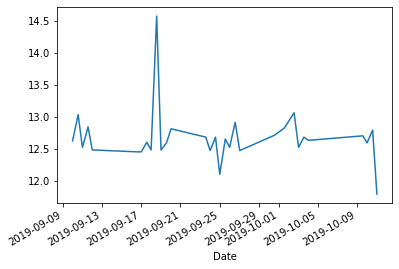

In [104]:
df['Distance'].plot.line();

Cumulative distance might be more informative:

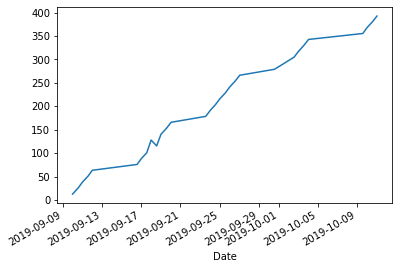

In [105]:
df['Distance'].cumsum().plot.line();

There are many configuration options for these plots which build of the `matplotlib` library:

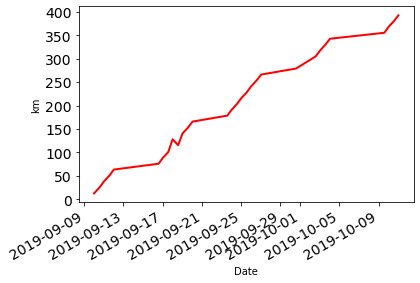

In [106]:
df['Distance'].cumsum().plot.line(fontsize=14, linewidth = 2, color = 'r', ylabel="km");

I actually usually use built-in themes for my plots which do a lot of the colour and text formatting for you:

In [107]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})

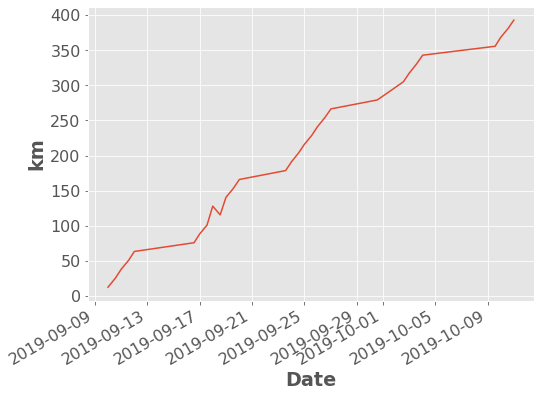

In [108]:
df['Distance'].dropna().cumsum().plot.line(ylabel="km");

Some people have also made custom themes, like this fun [cyberpunk theme](https://github.com/dhaitz/mplcyberpunk):

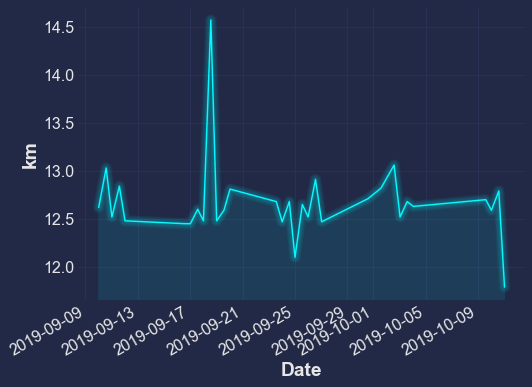

In [109]:
import mplcyberpunk
plt.style.use("cyberpunk")

df['Distance'].plot.line(ylabel="km")
mplcyberpunk.add_glow_effects()

There are many other kinds of plots you can make too:

|Method|Plot Type|
|---|---|
|`bar` or `barh` | bar plots|
|`hist` | histogram|
|`box` | boxplot|
|`kde` or `density` | density plots|
|`area` | area plots|
|`scatter` | scatter plots|
|`hexbin` | hexagonal bin plots|
|`pie` | pie plots|

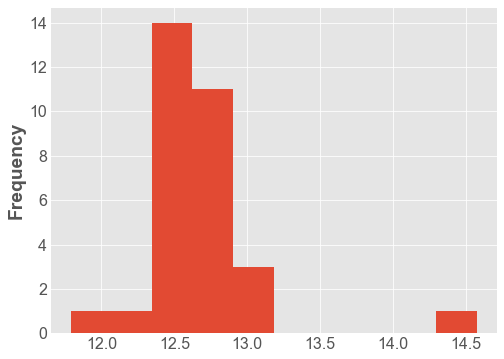

In [110]:
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16,
                     'axes.labelweight': 'bold',
                     'figure.figsize': (8,6)})
df['Distance'].plot.hist();

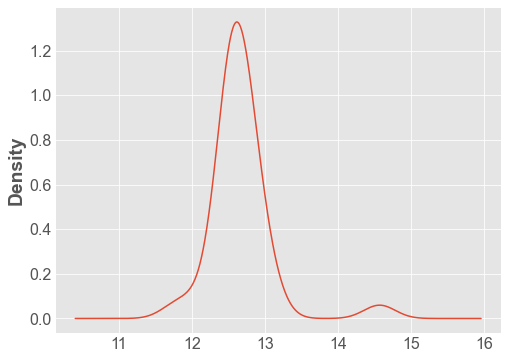

In [111]:
df['Distance'].plot.density();

### Pandas Plotting

Pandas also supports a few more advanced plotting functions in the `pandas.plotting` module. You can view them in the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html#plotting-tools).

In [112]:
from pandas.plotting import scatter_matrix

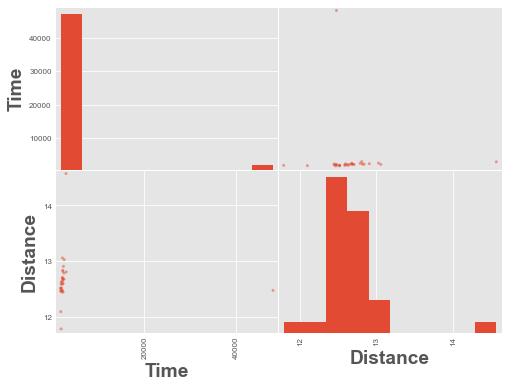

In [113]:
scatter_matrix(df);

We have an outlier time in the data above, a time value of ~48,000. Let's remove it and re-plot.

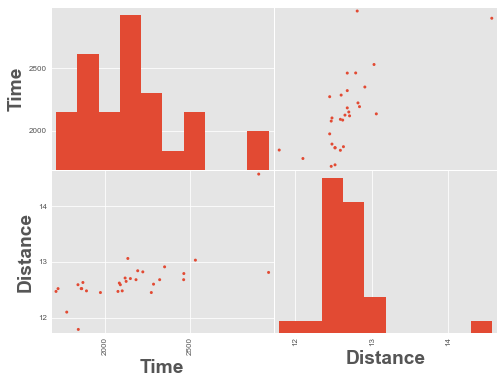

In [114]:
scatter_matrix(df.query('Time < 4000'), alpha=1);

## 5. Pandas Profiling

Pandas profiling is a nifty tool for generating summary reports and doing exploratory data analysis on dataframes. [Pandas profiling](https://github.com/pandas-profiling/pandas-profiling) is not part of base Pandas but you can install with: 

```
$ conda install -c conda-forge pandas-profiling
```

In [115]:
import pandas_profiling
df = pd.read_csv('data/cycling_data.csv')
df.profile_report(progress_bar=False)